<a href="https://colab.research.google.com/github/Gayatri4-kesina/ML-Notebook/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
Df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
Df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
Df.info()
Df['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X = Df.iloc[:, :-1].values
Y =  Df.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [ ]:

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
final_df = pd.concat([principal_df, pd.Series(Y_encoded, name='Target')], axis=1)
print(final_df.head())


        PC1       PC2       PC3  Target
0 -2.264542  0.505704  0.121943       0
1 -2.086426 -0.655405  0.227251       0
2 -2.367950 -0.318477 -0.051480       0
3 -2.304197 -0.575368 -0.098860       0
4 -2.388777  0.674767 -0.021428       0


In [ ]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.72770452 0.23030523 0.03683832]


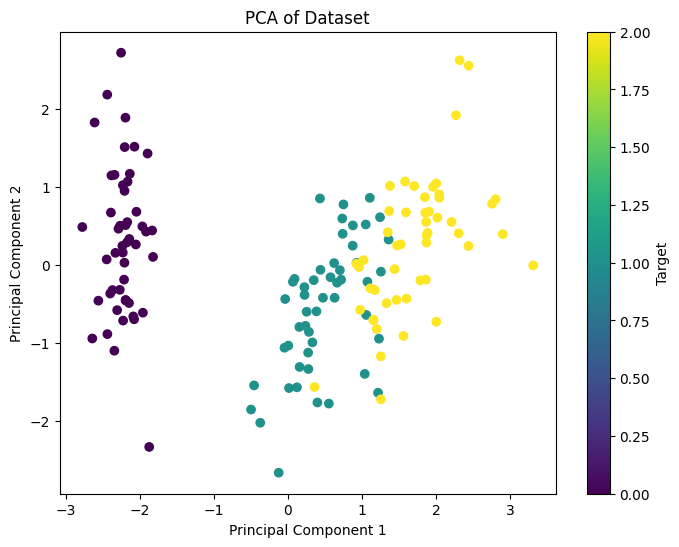

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(final_df['PC1'], final_df['PC2'], c=Y_encoded, cmap='viridis')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()


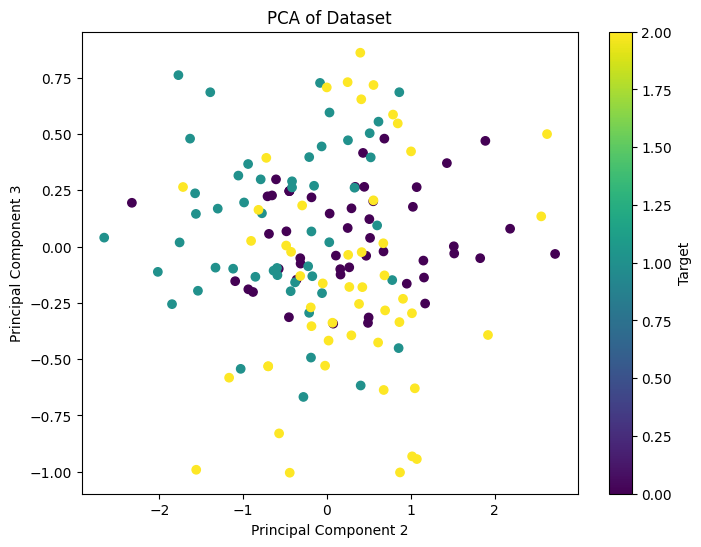

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(final_df['PC2'], final_df['PC3'], c=Y_encoded, cmap='viridis')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.colorbar(label='Target')
plt.show()


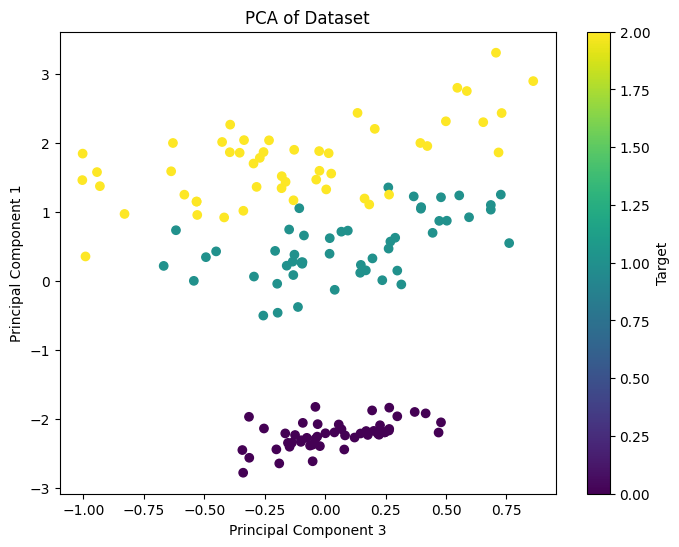

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(final_df['PC3'], final_df['PC1'], c=Y_encoded, cmap='viridis')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 1')
plt.colorbar(label='Target')
plt.show()
